In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('4_frame.txt')
data.columns = ['frame_id', 'pedestrian_id', 'x_position', 'y_position', 'z_position']

In [3]:
data = data.drop('z_position', axis=1)

In [47]:
max(data['pedestrian_id'])

447

In [4]:
window_size = 20
input_seq = []
output_seq = []
for pedestrian_id in data['pedestrian_id'].unique():
    ped_data = data[data['pedestrian_id'] == pedestrian_id]
    positions = ped_data[['x_position', 'y_position']].values
    for i in range(len(positions)-window_size):
        input_seq.append(positions[i:i+window_size])
        output_seq.append(positions[i+window_size])

In [5]:
input_seq = np.array(input_seq)
output_seq = np.array(output_seq)

# Reshape the input and output sequences for the LSTM model
input_seq = np.reshape(input_seq, (input_seq.shape[0], input_seq.shape[1], input_seq.shape[2]))
output_seq = np.reshape(output_seq, (output_seq.shape[0], output_seq.shape[1]))

# Define the LSTM model

In [6]:
model = Sequential()
model.add(LSTM(16, input_shape=(window_size, 2), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(8))
model.add(Dense(2))

In [7]:
model.compile(loss='mse', optimizer='adam')

In [8]:
train_size = int(0.8 * len(input_seq))
train_input_seq = input_seq[:train_size]
train_output_seq = output_seq[:train_size]
val_input_seq = input_seq[train_size:]
val_output_seq = output_seq[train_size:]

In [9]:
history = model.fit(train_input_seq, train_output_seq, epochs=50, batch_size=64, verbose=2, validation_data=(val_input_seq, val_output_seq))

Epoch 1/50
5433/5433 - 34s - loss: 7677.5698 - val_loss: 5883.3413 - 34s/epoch - 6ms/step
Epoch 2/50
5433/5433 - 32s - loss: 4448.4160 - val_loss: 3357.2939 - 32s/epoch - 6ms/step
Epoch 3/50
5433/5433 - 32s - loss: 2383.3049 - val_loss: 1642.0356 - 32s/epoch - 6ms/step
Epoch 4/50
5433/5433 - 30s - loss: 1094.1538 - val_loss: 707.6522 - 30s/epoch - 5ms/step
Epoch 5/50
5433/5433 - 30s - loss: 422.2852 - val_loss: 291.6208 - 30s/epoch - 6ms/step
Epoch 6/50
5433/5433 - 31s - loss: 139.9494 - val_loss: 120.7267 - 31s/epoch - 6ms/step
Epoch 7/50
5433/5433 - 29s - loss: 40.9121 - val_loss: 98.2144 - 29s/epoch - 5ms/step
Epoch 8/50
5433/5433 - 30s - loss: 24.8789 - val_loss: 108.0626 - 30s/epoch - 5ms/step
Epoch 9/50
5433/5433 - 29s - loss: 9.4107 - val_loss: 139.5387 - 29s/epoch - 5ms/step
Epoch 10/50
5433/5433 - 29s - loss: 6.6717 - val_loss: 170.2401 - 29s/epoch - 5ms/step
Epoch 11/50
5433/5433 - 29s - loss: 5.3400 - val_loss: 198.1180 - 29s/epoch - 5ms/step
Epoch 12/50
5433/5433 - 29s - lo

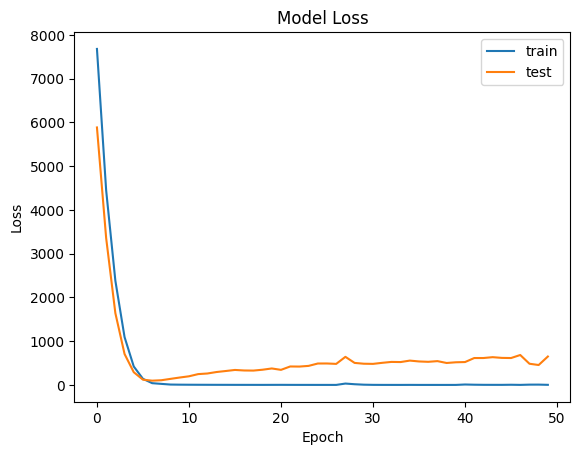

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
pred_input_seq = input_seq[train_size:]
pred_output_seq = model.predict(pred_input_seq)

2717/2717 [==============================] - 4s 1ms/step


In [54]:
ped_id = 150
ped_data = data[data['pedestrian_id'] == ped_id]
positions = ped_data[['x_position', 'y_position']].values

In [55]:
input_seq = np.array(input_seq)
output_seq = np.array(output_seq)

predicted_seq = model.predict(input_seq)
predicted_seq = np.insert(predicted_seq, 0, positions[:20], axis=0)

13583/13583 [==============================] - 18s 1ms/step


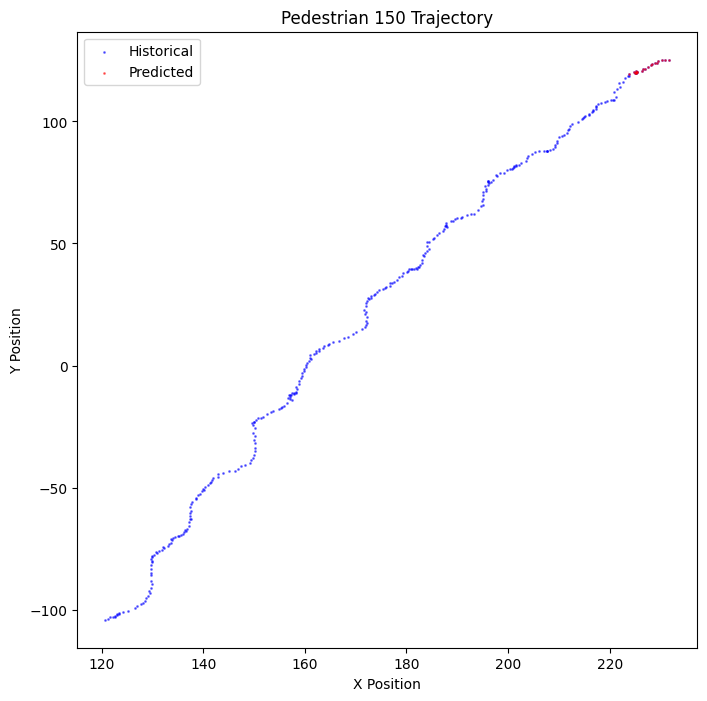

In [56]:
plt.figure(figsize=(8,8))
plt.scatter(positions[:,0], positions[:,1], s=1, c='blue', alpha=0.5)
plt.scatter(predicted_seq[0:20,0], predicted_seq[0:20,1], s=1, c='red', alpha=0.5)
plt.title(f"Pedestrian {ped_id} Trajectory")
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend(['Historical', 'Predicted'], loc='upper left')
plt.show()